# Nota

Este notebook serve para exercutar o código organizado nos diferentes ficheiros, usamos o `dev` para fazer o desenvolvimento pois é mais rápido para testar mas depois organizamos o código em diferentes ficheiros e fazemos as chamadas aqui em `main`.

In [9]:
# Importing classes of the project

# Reload classes in memory every time this code block is executed
%load_ext autoreload
%autoreload 2

# Importing necessary libraries
import pandas as pd


# Data Analysis Classes
from data_analysis.database import KagglehubSQLiteLoader
from data_analysis.analizer import TripDataAnalizer
from data_analysis.preprocessor import DataPreprocessor
from data_analysis.cleaner import DataCleaning

# EDA classes
from eda.eda import EDA
from eda.visualization import DataVisualization
from eda.featureAnalysis import FeatureAnalysis
from eda.featureGenerator import FeatureGenerator

# Statistical Analysis classes
from statistical_analysis.hypothesisTesting import HypothesisTesting

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
### Generate dataset to work with in following phases ###

# Load all 12 SQLite databases with data from all months
dataframes = []

for i in range(1,13):
    file = f"\\2019\\2019-{i:02}.sqlite"
    data = KagglehubSQLiteLoader("dhruvildave/new-york-city-taxi-trips-2019", file)

    # Random sample those databases to get a general sample with data from all of them


    df = data.get_table_dataframe_random_sample('tripdata', percentage=0.001)
    dataframes.append(df)



Dataset downloaded Successfully 
Dataset saved on:  C:\Users\usoda\.cache\kagglehub\datasets\dhruvildave\new-york-city-taxi-trips-2019\versions\4
Dataset downloaded Successfully 
Dataset saved on:  C:\Users\usoda\.cache\kagglehub\datasets\dhruvildave\new-york-city-taxi-trips-2019\versions\4
Dataset downloaded Successfully 
Dataset saved on:  C:\Users\usoda\.cache\kagglehub\datasets\dhruvildave\new-york-city-taxi-trips-2019\versions\4
Dataset downloaded Successfully 
Dataset saved on:  C:\Users\usoda\.cache\kagglehub\datasets\dhruvildave\new-york-city-taxi-trips-2019\versions\4
Dataset downloaded Successfully 
Dataset saved on:  C:\Users\usoda\.cache\kagglehub\datasets\dhruvildave\new-york-city-taxi-trips-2019\versions\4
Dataset downloaded Successfully 
Dataset saved on:  C:\Users\usoda\.cache\kagglehub\datasets\dhruvildave\new-york-city-taxi-trips-2019\versions\4
Dataset downloaded Successfully 
Dataset saved on:  C:\Users\usoda\.cache\kagglehub\datasets\dhruvildave\new-york-city-taxi-

In [4]:
# Join all the samples in a single dataframe
df = pd.concat(dataframes, ignore_index=True)


# Apply Analysis
analizer = TripDataAnalizer(df, "fare_amount")

# Apply Preprocessing
preprocessor = DataPreprocessor(analizer, 5)

# Apply Clean up
cleaner = DataCleaning(analizer)
cleaner.remove_outliers()
cleaner.handle_missing_values()

analizer.data_train

Feature columns extracted successfully.
Data divided successfully.
Features normalized successfully.
Missing values handled using strategy: drop


trip_distance  tip_amount  tolls_amount     extra  \
37293      -0.471885    0.089486     -0.229989 -0.065442   
83207      -0.353694   -0.407593     -0.229989 -0.870292   
80385       0.185876   -0.090960     -0.229989 -0.065442   
67186      -0.286890    0.395905     -0.229989 -0.065442   
67054       0.036852   -0.067128     -0.229989 -0.870292   
...              ...         ...           ...       ...   
7202        0.540450    0.702324     -0.229989 -0.467867   
61761      -0.379387   -0.748058     -0.229989  1.141833   
46590       1.126268   -0.748058     -0.229989 -0.870292   
12950      -0.176407    0.327812     -0.229989 -0.870292   
23542      -0.636325   -0.748058     -0.229989 -0.870292   

       pickup_time_in_seconds  dropoff_time_in_seconds  passenger_count  \
37293               -0.256200                -0.256249        -0.470076   
83207                1.687665                 1.687616        -0.470076   
80385                1.578126                 1.578113         0.359380   
67186                1.051908                 1.051903        -0.470076   
67054                1.047512                 1.047468         3.677204   
...                       ...                      ...              ...   
7202                -1.396290                -1.387231        -0.470076   
61761                0.824126                 0.824131        -0.470076   
46590                0.138267                 0.138515        -0.470076   
12950               -1.179645                -1.179643        -0.470076   
23542               -0.783479                -0.783559         0.359380   

       pickup_hour  pickup_day_of_week  pickup_day_of_month  ...  \
37293     0.510361            0.015449             1.660107  ...   
83207    -0.987635           -1.533255             0.855364  ...   
80385     0.510361           -0.500786            -0.524195  ...   
67186     0.676805           -0.500786             0.050621  ...   
67054    -1.154080           -0.500786             0.050621  ...   
...            ...                 ...                  ...  ...   
7202     -0.321859           -1.017021             1.545144  ...   
61761    -0.155415            1.564153             0.740401  ...   
46590     0.177473            0.015449            -0.524195  ...   
12950    -0.155415            0.015449             0.625438  ...   
23542     0.177473            0.015449            -1.328938  ...   

       dropoff_day_of_week  dropoff_day_of_month  dropoff_month  mta_tax  \
37293             0.013427              1.660260      -0.386076   0.0891   
83207            -1.533337              0.855472       1.622678   0.0891   
80385            -0.502161             -0.524165       1.622678   0.0891   
67186            -0.502161              0.050683       1.048749   0.0891   
67054            -0.502161              0.050683       1.048749   0.0891   
...                    ...                   ...            ...      ...   
7202             -0.502161              1.660260      -1.533935   0.0891   
61761             1.560191              0.740502       0.761784   0.0891   
46590             0.013427             -0.524165       0.187854   0.0891   
12950             0.013427              0.625532      -1.246970   0.0891   
23542             0.013427             -1.328953      -0.673041   0.0891   

       congestion_surcharge  vendorid  ratecodeid  pulocationid  dolocationid  \
37293              0.373137  0.333333         0.0      0.939394      0.295455   
83207              0.373137  0.333333         0.0      0.640152      0.424242   
80385              0.373137  0.333333         0.0      0.045455      0.928030   
67186              0.373137  0.333333         0.0      0.890152      0.609848   
67054              0.373137  0.333333         0.0      0.852273      0.863636   
...                     ...       ...         ...           ...           ...   
7202              -2.605413  0.333333         0.0      0.401515      0.897727   
61761  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
Index: 8803 entries, 6601 to 10849
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            8803 non-null   float64
 1   tip_amount               8803 non-null   float64
 2   tolls_amount             8803 non-null   float64
 3   extra                    8803 non-null   float64
 4   pickup_time_in_seconds   8803 non-null   float64
 5   dropoff_time_in_seconds  8803 non-null   float64
 6   passenger_count          8803 non-null   float64
 7   pickup_hour              8803 non-null   float64
 8   pickup_day_of_week       8803 non-null   float64
 9   pickup_day_of_month      8803 non-null   float64
 10  pickup_month             8803 non-null   float64
 11  dropoff_hour             8803 non-null   float64
 12  dropoff_day_of_week      8803 non-null   float64
 13  dropoff_day_of_month     8803 non-null   float64
 14  dropoff_mo

<Figure size 1200x1200 with 0 Axes>

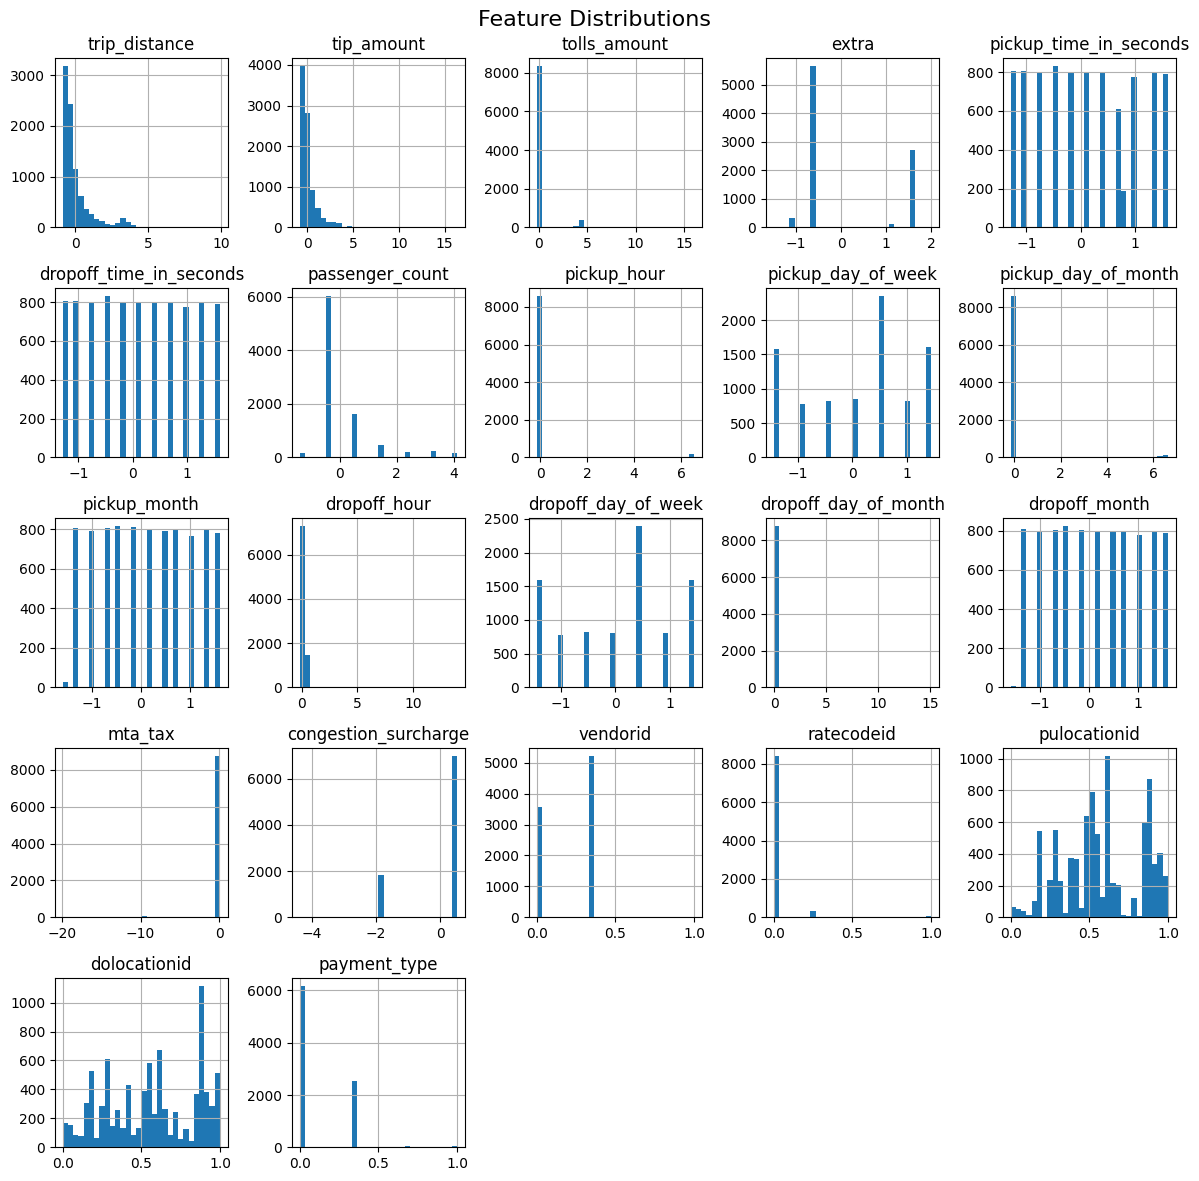

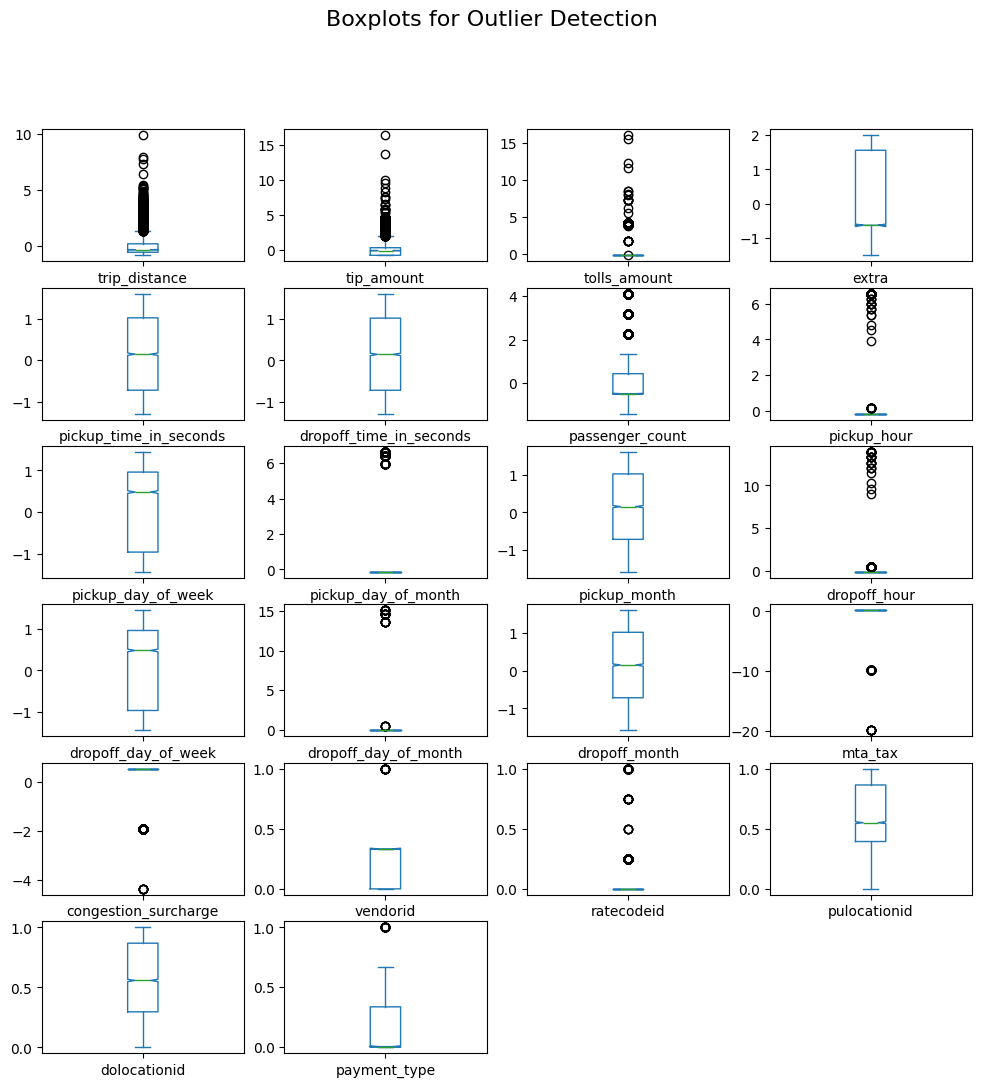

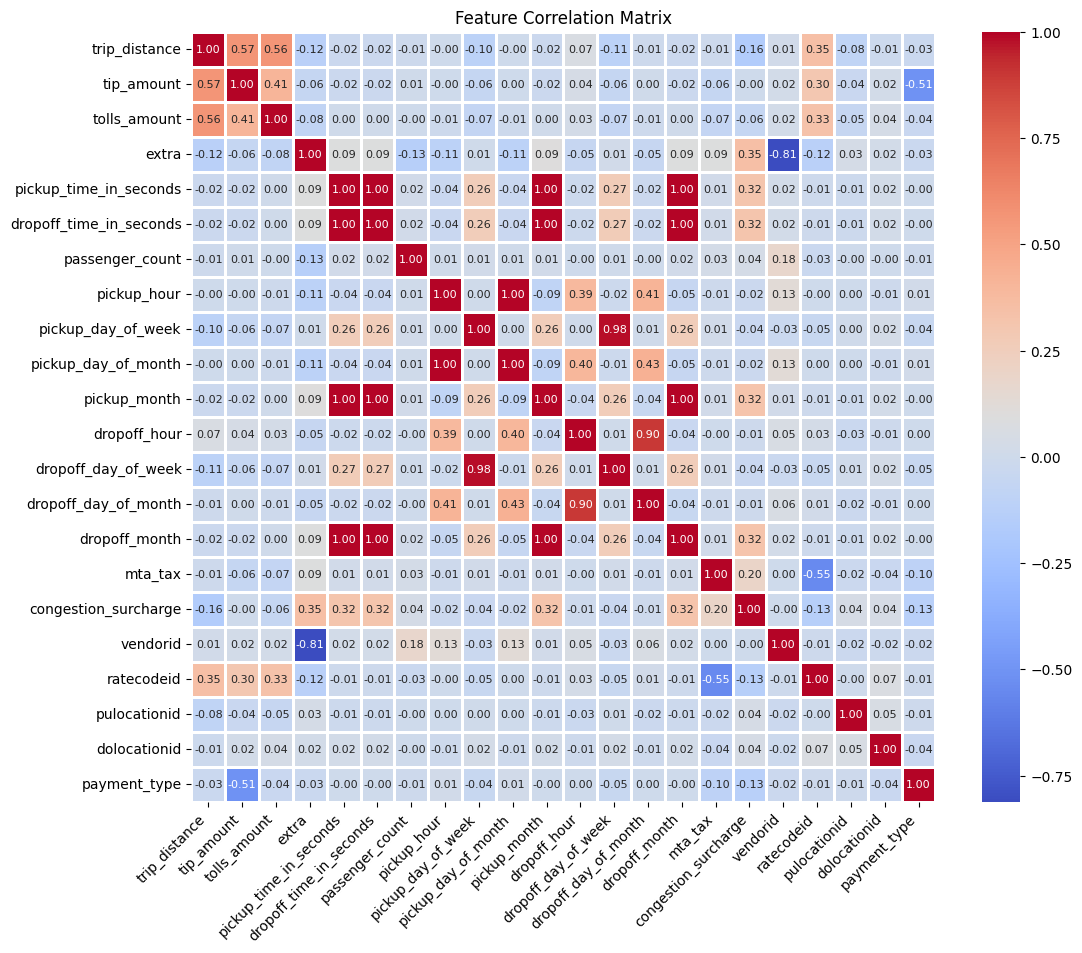

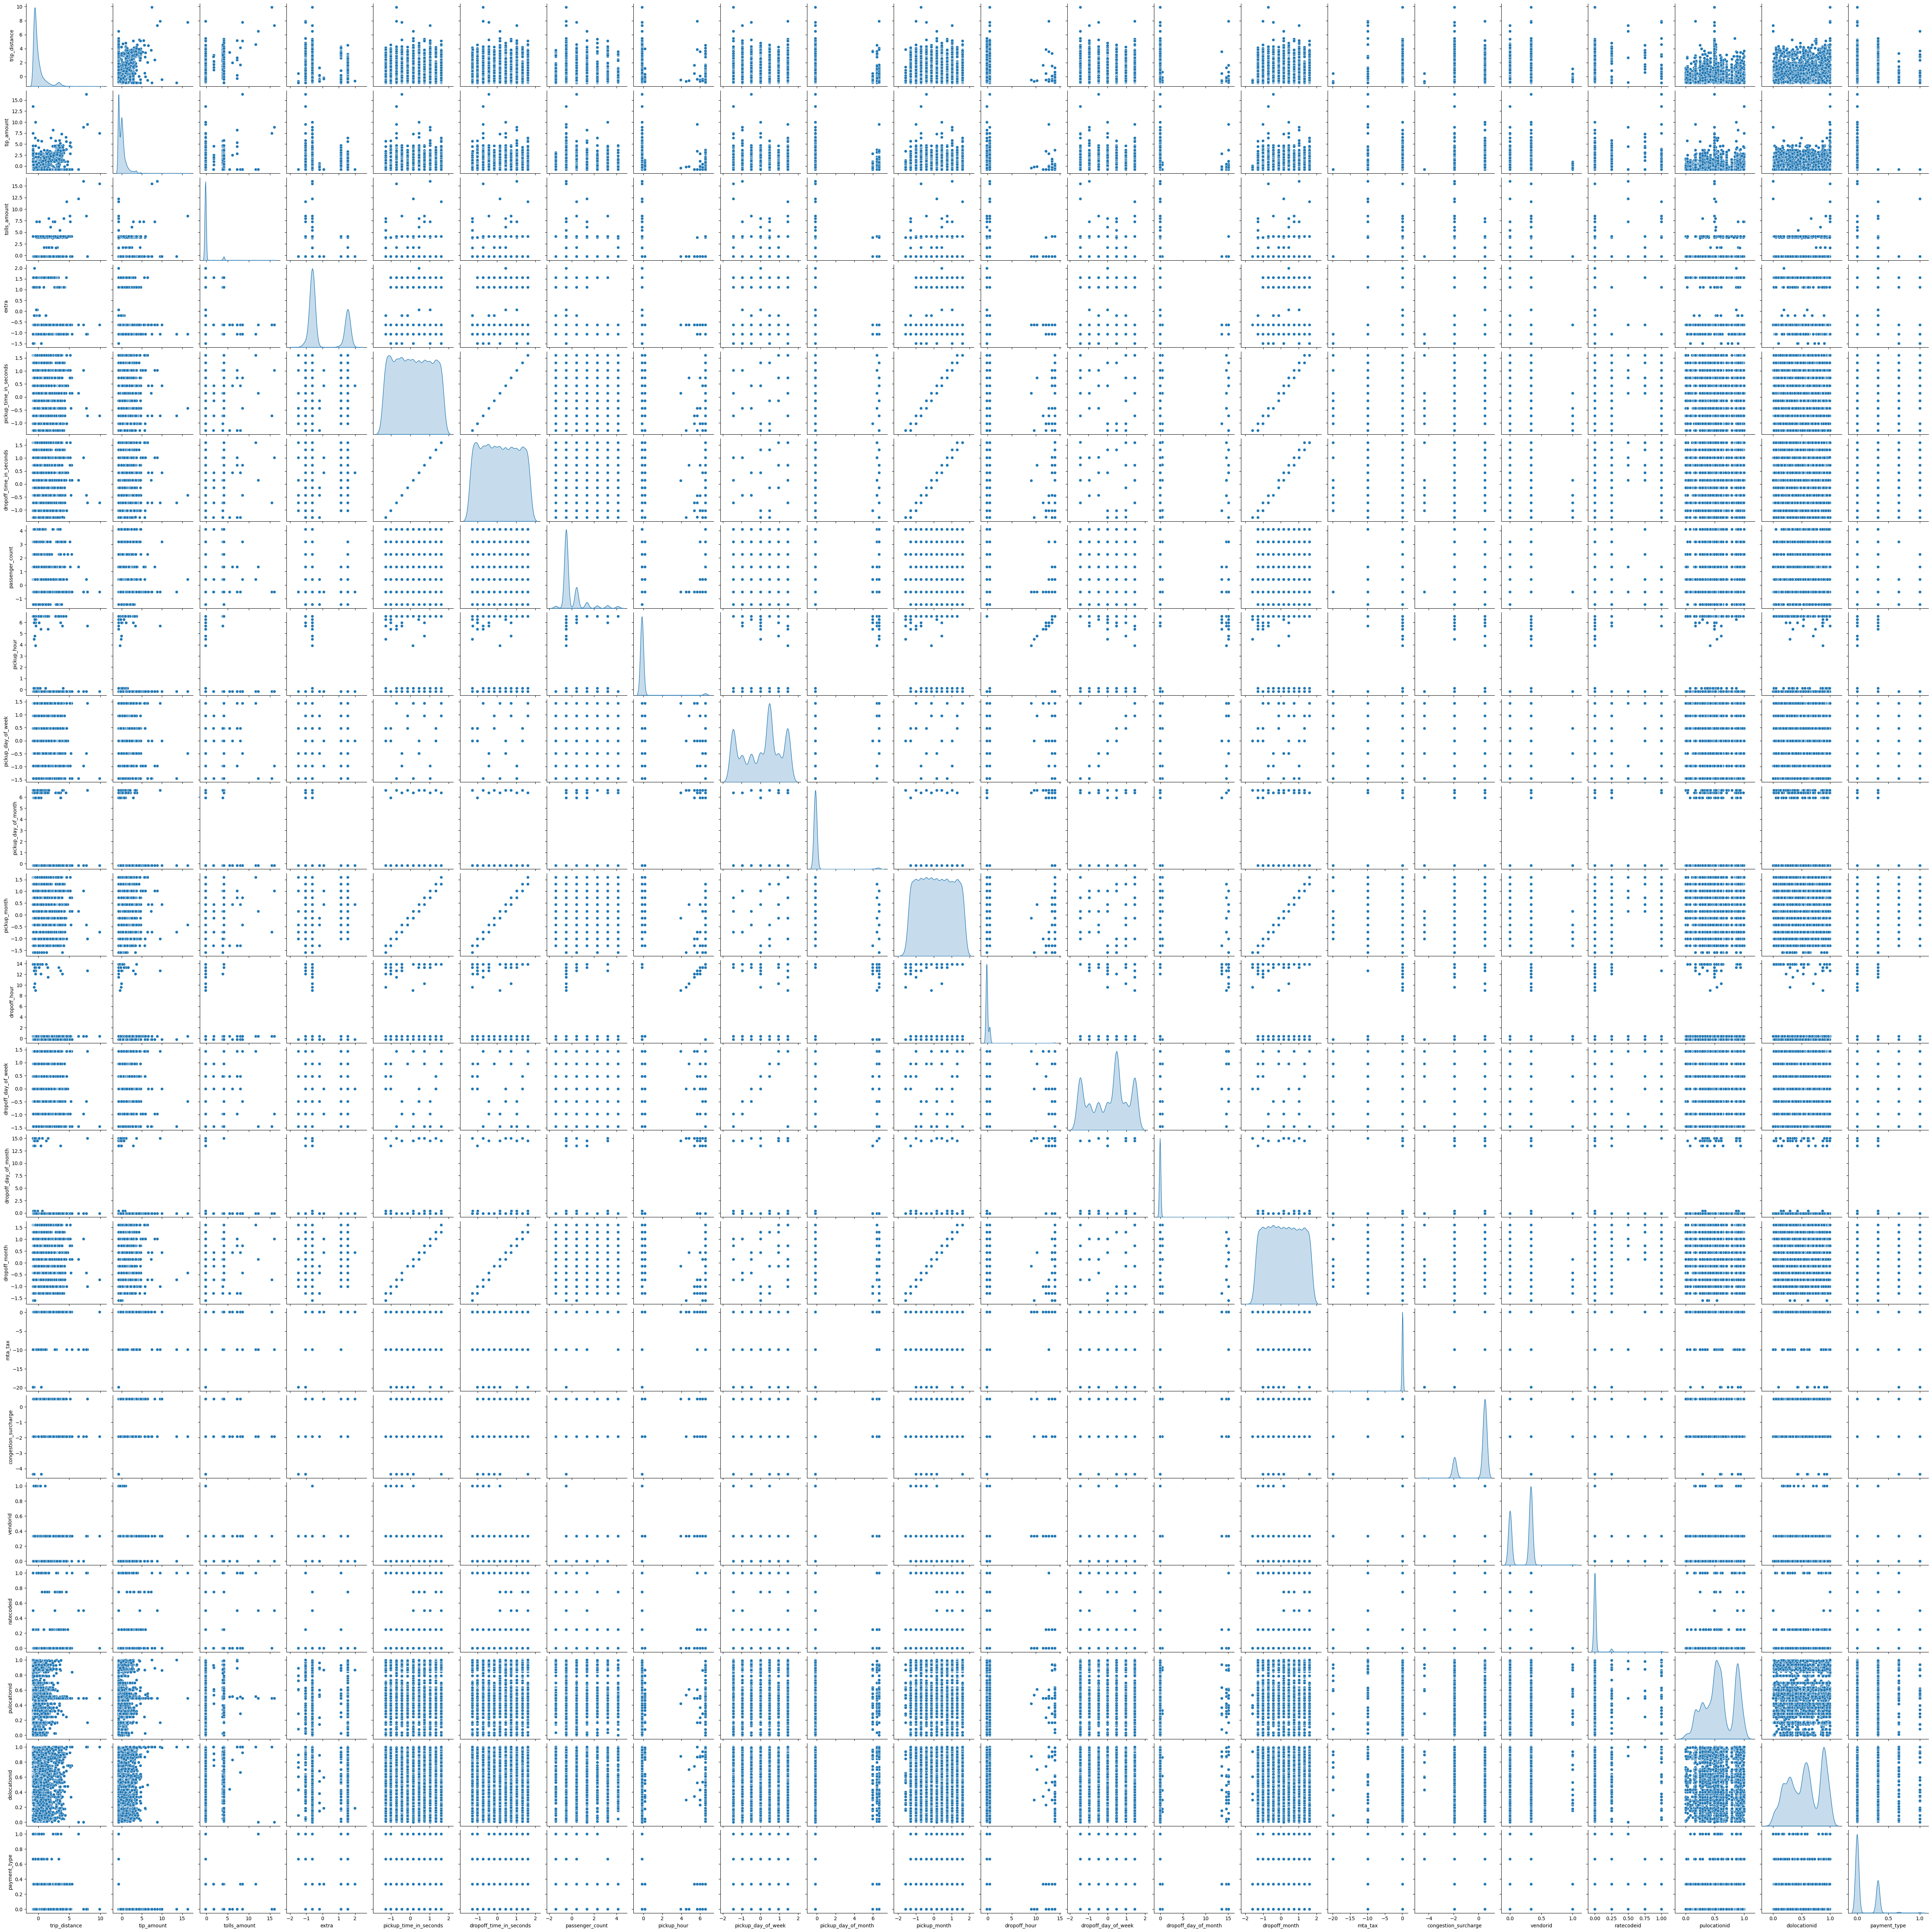

EDA completed successfully.


In [12]:
eda = EDA(analizer)
eda.run_eda()


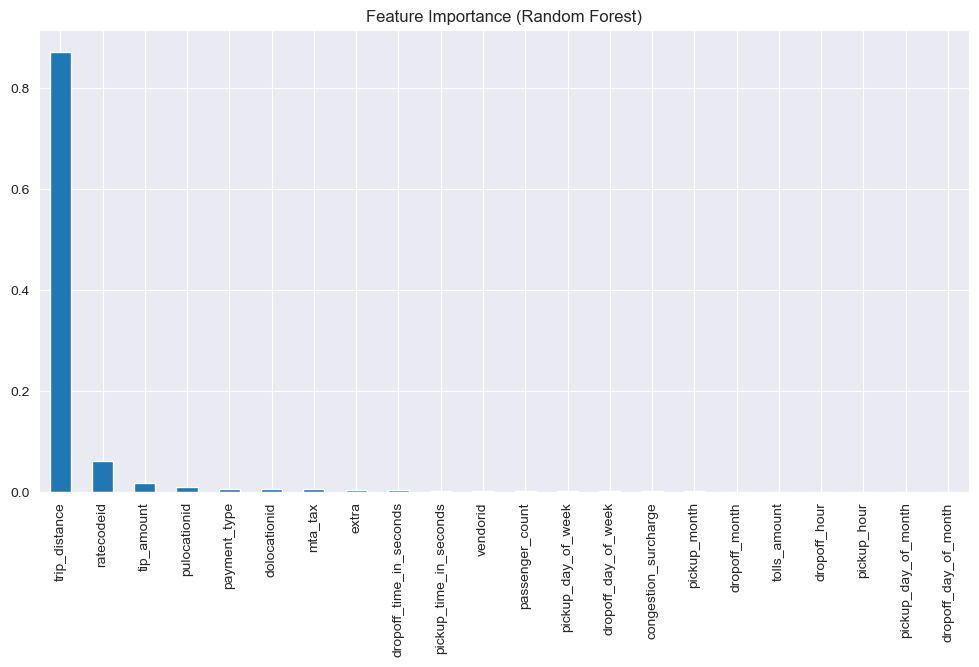

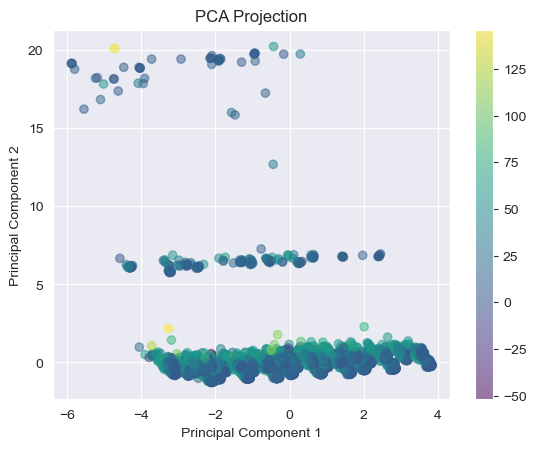

Feature Analysis completed successfully.


In [5]:
analysis = FeatureAnalysis(analizer)
analysis.run_all()

Trip duration calculated successfully.
Average speed calculated successfully.
Interaction features added successfully.


C:\Users\usoda\anaconda3\envs\Project_dependencies\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\usoda\anaconda3\envs\Project_dependencies\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\usoda\anaconda3\envs\Project_dependencies\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


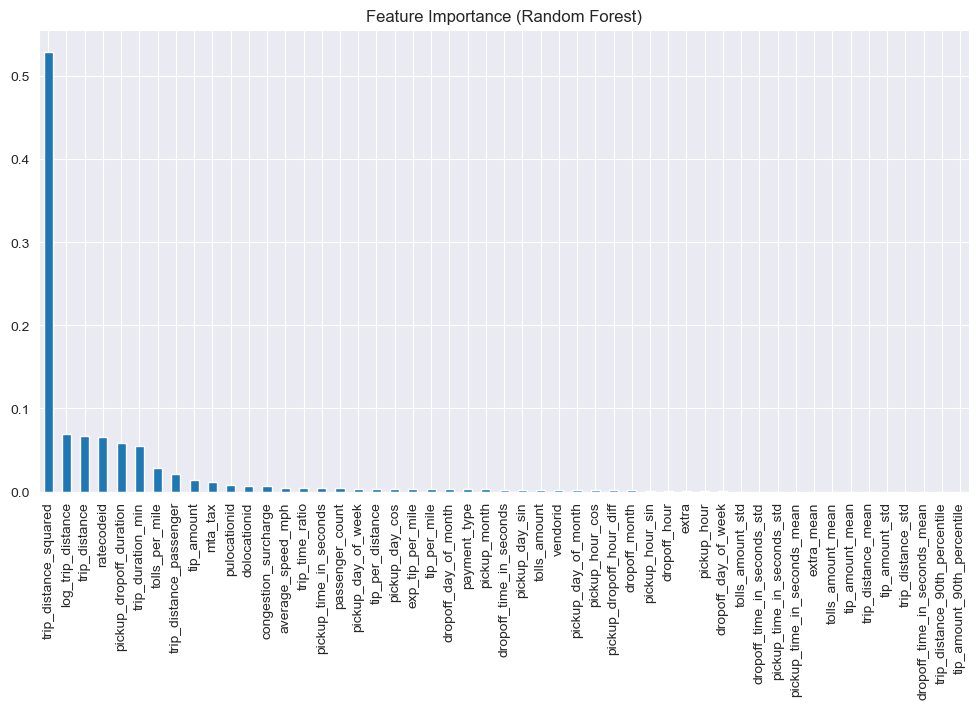

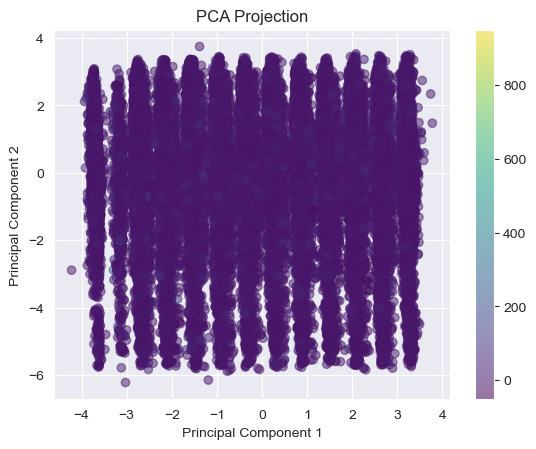

Feature Analysis completed successfully.


In [5]:
# Create new features and reapply FeatureAnalysis

feature_generator = FeatureGenerator(analizer)
feature_generator.generate_features()

analysis = FeatureAnalysis(analizer)
analysis.run_all()


Data Visualization Plots:
-------------------------

Pairplot:

Boxplot:


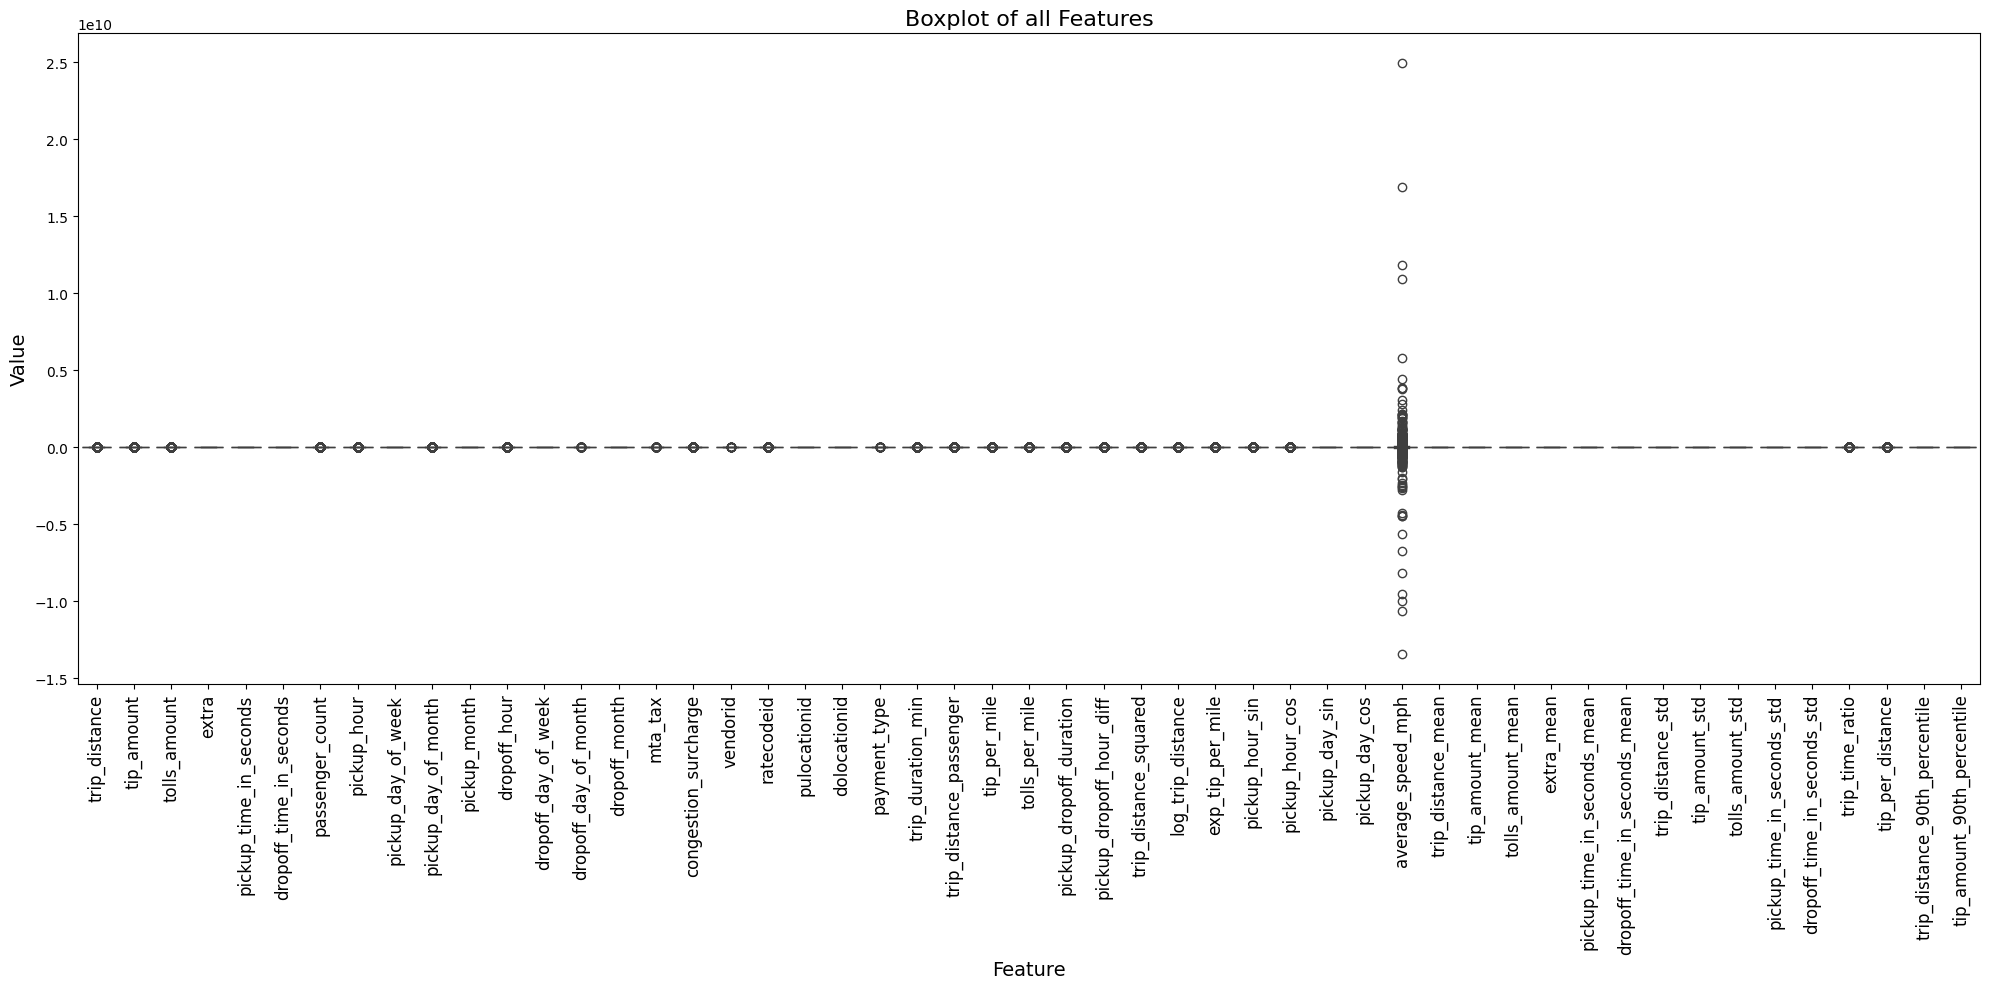


Ridgeplot:


C:\Users\bruno\PycharmProjects\DataScience\code\eda\visualization.py:81: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=self.data_analizer.data_train[feature], ax=axes[i], color=color, fill=True, linewidth=2)
C:\Users\bruno\PycharmProjects\DataScience\code\eda\visualization.py:81: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=self.data_analizer.data_train[feature], ax=axes[i], color=color, fill=True, linewidth=2)
C:\Users\bruno\PycharmProjects\DataScience\code\eda\visualization.py:81: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=self.data_analizer.data_train[feature], ax=axes[i], color=color, fill=True, linewidth=2)
C:\Users\bruno\PycharmProjects\DataScience\code\eda\visualization.py:81: UserWarning: Dataset has 0 variance;

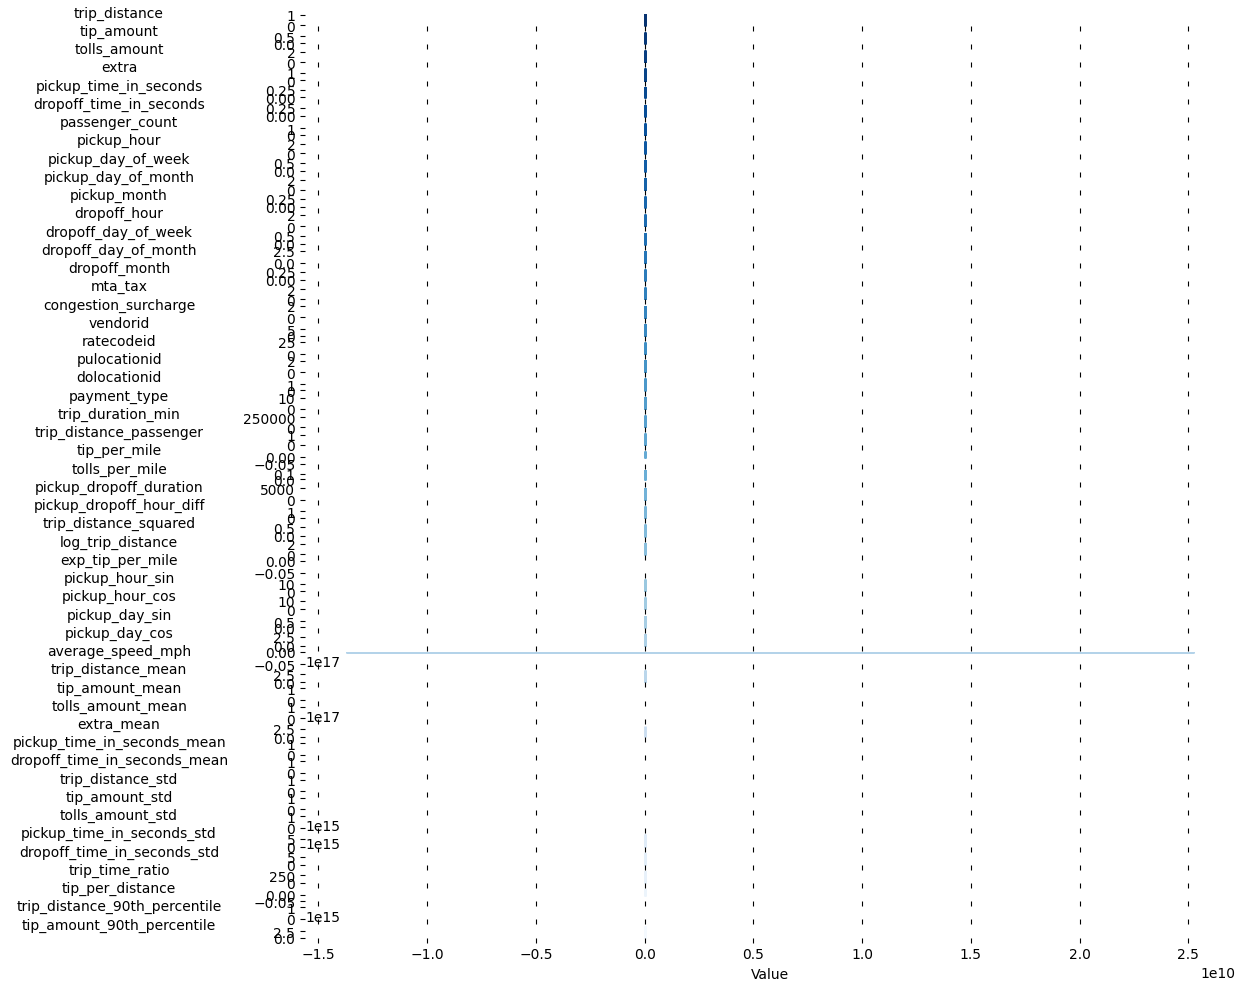

In [32]:
visualizer = DataVisualization(analizer)
visualizer.perform_visualization()

In [ ]:
hypothesisTester = HypothesisTesting(analizer)

hypothesisTester.t_test_results()
hypothesisTester.anova_results()
hypothesisTester.kruskal_wallis_results()




T-test results:
Feature: trip_distance
Class 1: 9.0,  Class 2: 26.0
Significant
Class 1: 9.0,  Class 2: 4.5
Significant
Class 1: 9.0,  Class 2: 10.0
Significant
Class 1: 9.0,  Class 2: 5.0
Significant
Class 1: 9.0,  Class 2: 8.0
Significant
Class 1: 9.0,  Class 2: 10.5
Significant
Class 1: 9.0,  Class 2: 5.5
Significant
Class 1: 9.0,  Class 2: 8.5
Significant
Class 1: 9.0,  Class 2: 6.5
Significant
Class 1: 9.0,  Class 2: 11.5
Significant
Class 1: 9.0,  Class 2: 12.0
Significant
Class 1: 9.0,  Class 2: 7.0
Significant
Class 1: 9.0,  Class 2: 52.5
Significant
Class 1: 9.0,  Class 2: 15.5
Significant
Class 1: 9.0,  Class 2: 22.5
Significant
Class 1: 9.0,  Class 2: 28.0
Significant
Class 1: 9.0,  Class 2: 16.0
Significant
Class 1: 9.0,  Class 2: 3.5
Significant
Class 1: 9.0,  Class 2: 25.0
Significant
Class 1: 9.0,  Class 2: 20.0
Significant
Class 1: 9.0,  Class 2: 35.0
Significant
Class 1: 9.0,  Class 2: 140.0
Significant
Class 1: 9.0,  Class 2: 52.0
Significant
Class 1: 9.0,  Class 2:

C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Significant
Class 1: 9.0,  Class 2: 33.5
Significant
Class 1: 9.0,  Class 2: 21.0
Significant
Class 1: 9.0,  Class 2: 3.0
Significant
Class 1: 9.0,  Class 2: 23.0
Significant
Class 1: 9.0,  Class 2: 34.5
Significant
Class 1: 9.0,  Class 2: 33.0
Significant
Class 1: 9.0,  Class 2: 27.5
Significant
Class 1: 9.0,  Class 2: 24.5
Significant
Class 1: 9.0,  Class 2: 34.0
Significant
Class 1: 9.0,  Class 2: 21.5
Significant
Class 1: 9.0,  Class 2: 18.0
Significant
Class 1: 9.0,  Class 2: 37.0
Significant
Class 1: 9.0,  Class 2: 32.0
Significant
Class 1: 9.0,  Class 2: 35.5
Significant
Class 1: 9.0,  Class 2: 50.0
Significant
Class 1: 9.0,  Class 2: 17.5
Significant
Class 1: 9.0,  Class 2: 37.5
Significant
Class 1: 9.0,  Class 2: 57.0
Significant
Class 1: 9.0,  Class 2: 31.0
Significant
Class 1: 9.0,  Class 2: 68.5
Significant
Class 1: 9.0,  Class 2: 30.5
Significant
Class 1: 9.0,  Class 2: 50.5
Significant
Class 1: 9.0,  Class 2: 0.0
Not Significant
Class 1: 9.0,  Class 2: 41.5
Significant
Cl

C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:6195: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


Significant
Class 1: 52.5,  Class 2: 4.0
Significant
Class 1: 52.5,  Class 2: 24.0
Significant
Class 1: 52.5,  Class 2: 28.5
Significant
Class 1: 52.5,  Class 2: 6.0
Significant
Class 1: 52.5,  Class 2: 2.5
Significant
Class 1: 52.5,  Class 2: 31.5
Significant
Class 1: 52.5,  Class 2: 19.0
Significant
Class 1: 52.5,  Class 2: 15.0
Significant
Class 1: 52.5,  Class 2: 9.5
Significant
Class 1: 52.5,  Class 2: 16.5
Significant
Class 1: 52.5,  Class 2: 14.0
Significant
Class 1: 52.5,  Class 2: 29.5
Significant
Class 1: 52.5,  Class 2: 12.5
Significant
Class 1: 52.5,  Class 2: 51.5
Not Significant
Class 1: 52.5,  Class 2: 41.0
Significant
Class 1: 52.5,  Class 2: 36.5
Significant
Class 1: 52.5,  Class 2: 20.5
Significant
Class 1: 52.5,  Class 2: 26.5
Significant
Class 1: 52.5,  Class 2: 18.5
Significant
Class 1: 52.5,  Class 2: 13.5
Significant
Class 1: 52.5,  Class 2: -52.0
Significant
Class 1: 52.5,  Class 2: 33.5
Significant
Class 1: 52.5,  Class 2: 21.0
Significant
Class 1: 52.5,  Class

In [11]:
# Exporting dataset to disk
analizer.save_dataset("../out/dataset.csv")

Dataset saved successfully to ../out/dataset.csv.
